In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset from the local CSV file
df = pd.read_csv('Titanic-Dataset.csv')

print("Dataset loaded successfully from local CSV!")
df.head()

Dataset loaded successfully from local CSV!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display a concise summary of the dataframe
print("Dataset Information:")
df.info()

# Check for missing (null) values in each column
print("\nMissing Values Count:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values Count:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin     

In [5]:
# --- Handling 'Age' ---
# We will fill the missing age values with the median age.
# Median is often better than mean because it's less affected by outlier ages (e.g., a few very old passengers).
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
print(f"Missing 'Age' values filled with median: {median_age}")

# --- Handling 'Cabin' ---
# The 'Cabin' column has too many missing values to be useful.
# It's best practice to drop columns like this.
df.drop(columns=['Cabin'], inplace=True)
print("'Cabin' column dropped due to too many missing values.")

# --- Handling 'Embarked' ---
# There are a couple of missing values in 'Embarked'. We'll fill them with the most common port.
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)
print(f"Missing 'Embarked' values filled with mode: {mode_embarked}")


# --- Verification ---
# Let's run the check again to confirm there are no more missing values.
print("\nMissing Values Count after handling:")
print(df.isnull().sum())

Missing 'Age' values filled with median: 28.0
'Cabin' column dropped due to too many missing values.
Missing 'Embarked' values filled with mode: S

Missing Values Count after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\Ishu Kaur\AppData\Local\Temp\ipykernel_13688\4048483803.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
C:\Users\Ishu Kaur\AppData\Local\Temp\ipykernel_13688\4048483803.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [6]:
# Convert categorical features into numerical ones using one-hot encoding.
# We will also drop some columns that are not useful for prediction, like Name and Ticket number.
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Drop columns that are not useful for building a model
df.drop(columns=['Name', 'Ticket'], inplace=True)


# Display the first 5 rows to see the changes
print("Dataset after One-Hot Encoding and dropping irrelevant columns:")
df.head()

Dataset after One-Hot Encoding and dropping irrelevant columns:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [7]:
from sklearn.preprocessing import StandardScaler

# Identify the numerical columns that need to be scaled.
# We don't scale columns that are already 0s and 1s (like Survived or the new one-hot encoded columns).
numerical_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Display the first 5 rows to see the scaled data
print("Dataset after standardizing numerical features:")
df.head()

Dataset after standardizing numerical features:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,True,False,True
1,2,1,-1.566107,0.663861,0.432793,-0.473674,0.786845,False,False,False
2,3,1,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,False,False,True
3,4,1,-1.566107,0.433312,0.432793,-0.473674,0.420730,False,False,True
4,5,0,0.827377,0.433312,-0.474545,-0.473674,-0.486337,True,False,True


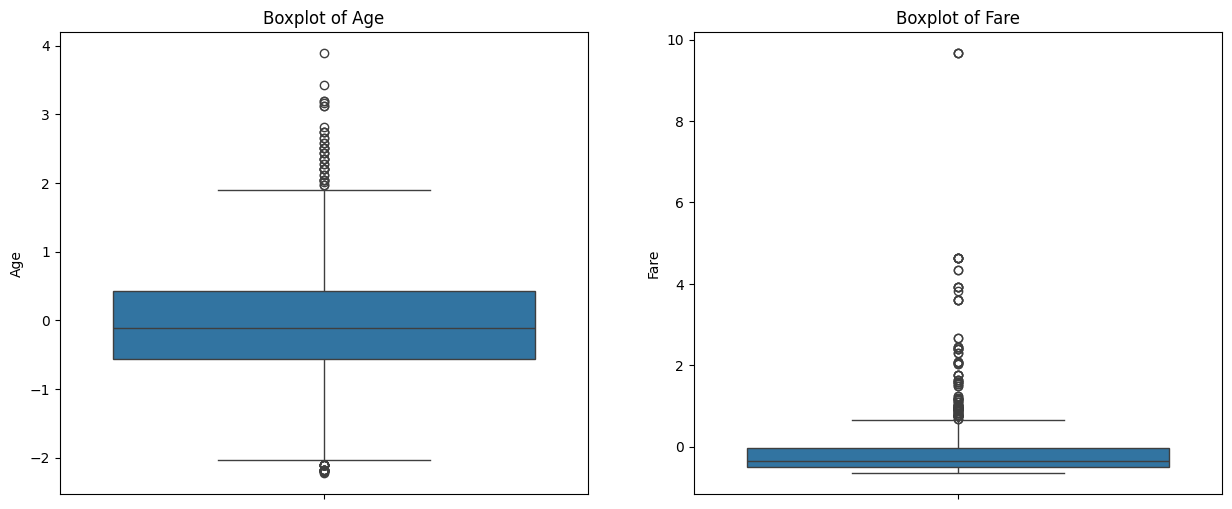

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's visualize outliers in 'Age' and 'Fare'
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')

plt.show()

Original dataset shape: (891, 10)
Dataset shape after removing 'Fare' outliers: (775, 10)


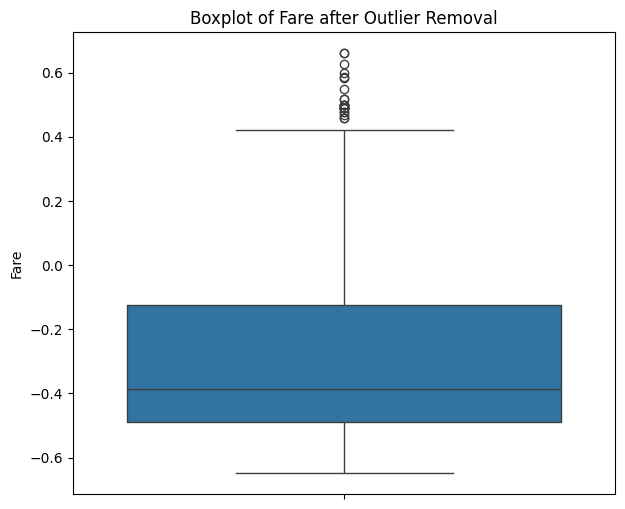

In [9]:
# Handling outliers in 'Fare' using the IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing 'Fare' outliers: {df_no_outliers.shape}")

# Visualize 'Fare' again after removing outliers
plt.figure(figsize=(7, 6))
sns.boxplot(y=df_no_outliers['Fare'])
plt.title('Boxplot of Fare after Outlier Removal')
plt.show()